## 02 Status
Some parts were made with, Sebastian Steen Lundby Hansen, Sebastian Bentley, Michael Ibsen and Thor Christensen

## 03 Solution part 1

In [37]:
import requests
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

In [35]:
data = ('../data/iris_data.csv')
df = pd.read_csv(data, decimal=',')
#print(df.head())

df.drop(['Petal length', 'Petal width'],'columns',inplace=True)
print(df.head())

labels =preprocessing.LabelEncoder()
df['Species'] = labels.fit_transform(df['Species'].astype(str))
df

#df.plot.scatter(x=0, y=1)

   Sepal length  Sepal width    Species
0           5.1          3.5  I. setosa
1           4.9          3.0  I. setosa
2           4.7          3.2  I. setosa
3           4.6          3.1  I. setosa
4           5.0          3.6  I. setosa


Sepal length  Sepal width  Species
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
..            ...          ...      ...
145           6.7          3.0        2
146           6.3          2.5        2
147           6.5          3.0        2
148           6.2          3.4        2
149           5.9          3.0        2

[150 rows x 3 columns]

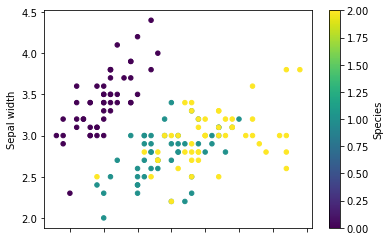

In [34]:
df.plot.scatter(x='Sepal length', y='Sepal width', c='Species', colormap='viridis')
#plt.figure()

#for u in labels:
    #plt.scatter(x=df["Sepal length"], y=df["Sepal width"], s=df["Species"]==u)


In [57]:
bw = estimate_bandwidth(df, quantile=0.21)
analyser = MeanShift(bandwidth=bw)
analyser.fit(df)

labels = analyser.labels_
n_clusters = len(np.unique(labels))
print(labels)
cluster_centers = analyser.cluster_centers_
print(cluster_centers)
print(n_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[4.95777778 3.39333333 0.        ]
 [5.9        2.775      1.        ]
 [6.45945946 2.98378378 2.        ]]
3


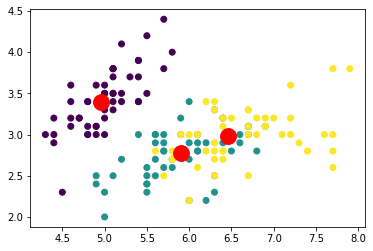

In [58]:
plot2 = np.array(df)
plt.scatter(plot2[:,0],plot2[:,1],c=labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='.', color = 'r', s = 1000)